In [4]:
import ast
import pandas as pd 

df = pd.read_csv('flood_risk_data.csv')

df_llr2 = pd.DataFrame(df['liste_libelle_risque'].apply(ast.literal_eval))
df_exploded = pd.DataFrame(df_llr2['liste_libelle_risque'].explode())
df_normalized = pd.json_normalize(df_exploded)
df_result = pd.concat([df_normalized, df['libelle_commune'].repeat(df_llr2['liste_libelle_risque'].str.len()).reset_index(drop=True)], axis=1)

In [9]:
import pandas as pd
import ast  # Pour convertir une chaîne représentant une liste en liste

# Charger uniquement les colonnes nécessaires
cols_to_load = ['liste_libelle_risque', 'libelle_commune']
data = pd.read_csv('flood_risk_data.csv')

# Convertir la colonne `liste_libelle_risque` en une liste de dictionnaires
data['liste_libelle_risque'] = data['liste_libelle_risque'].apply(ast.literal_eval)

# Séparer les éléments des dictionnaires en colonnes distinctes
expanded_data = data.explode('liste_libelle_risque')  # Sépare chaque élément de la liste dans une nouvelle ligne
expanded_data[['num_risque', 'libelle_risque_long']] = expanded_data['liste_libelle_risque'].apply(pd.Series)

# Supprimer la colonne d'origine après extraction
expanded_data = expanded_data.drop(columns=['liste_libelle_risque'])

# Afficher les premières lignes du DataFrame transformé
expanded_data.head()

,code_national_tri,libelle_tri,libelle_bassin_risques,date_arrete_pcb,date_arrete_carte,date_arrete_pcb_local,date_arrete_prefet_parties_prenantes,date_arrete_approbation,date_arrete_national,code_insee,libelle_commune,num_risque,libelle_risque_long
0,01DREAL20160001,Lyon,NaN,12/12/2012,20/12/2013,15/02/2016,NaN,NaN,06/11/2012,01030,BEAUREGARD,180,Par une crue à débordement lent de cours d'eau
0,01DREAL20160001,Lyon,NaN,12/12/2012,20/12/2013,15/02/2016,NaN,NaN,06/11/2012,01030,BEAUREGARD,183,Par une crue torrentielle ou à montée rapide d...
1,01DREAL20160001,Lyon,NaN,12/12/2012,20/12/2013,15/02/2016,NaN,NaN,06/11/2012,01043,BEYNOST,180,Par une crue à débordement lent de cours d'eau
1,01DREAL20160001,Lyon,NaN,12/12/2012,20/12/2013,15/02/2016,NaN,NaN,06/11/2012,01043,BEYNOST,183,Par une crue torrentielle ou à montée rapide d...
2,71DREAL20140002,TRI du Mâconnais,RMC,12/12/2012,20/12/2013,15/02/2016,04/03/2016,21/12/2016,27/04/2012,01123,CORMORANCHE-SUR-SAONE,180,Par une crue à débordement lent de cours d'eau


In [26]:
from cartiflette import carti_download

france = carti_download(
    values=["France"],
    crs=4326,
    borders="COMMUNE",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)
france = france.loc[france["INSEE_REG"] > 10]

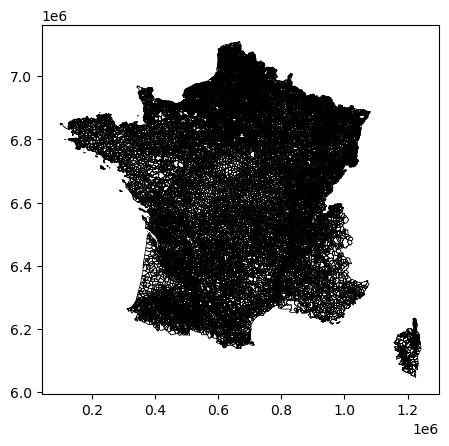

In [27]:
france_2154 = france.to_crs(2154)
ax1 = france_2154.boundary.plot(edgecolor="k", linewidth=0.5)


In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from cartiflette import carti_download

#Télécharger les données géographiques des communes françaises via Cartiflette
france = carti_download(
    values=["France"],
    crs=4326,
    borders="COMMUNE",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

#Filtrer pour ne garder que les communes métropolitaines
france = france.loc[france["INSEE_REG"] > 10]

#Charger vos données de risques transformées et associer les risques multiples à chaque commune
risk_data_grouped = expanded_data.groupby('code_insee')['libelle_risque_long'].apply(
    lambda x: ', '.join(x.unique())
).reset_index()

#Fusionner les données géographiques avec les risques
geo_risks = france.merge(risk_data_grouped, left_on='INSEE_COM', right_on='code_insee', how='left')

# 4. Créer la carte
fig, ax = plt.subplots(1, 1, figsize=(12, 15))

# Afficher les limites des communes
france.boundary.plot(ax=ax, linewidth=0.5, color="gray")

# Remplir les communes avec des couleurs basées sur les risques
geo_risks.plot(
    column='libelle_risque_long',  # Colonne contenant les types de risques
    ax=ax,
    legend=True,
    cmap="Set3",  # Palette de couleurs pour différencier les risques
    legend_kwds={'bbox_to_anchor': (1, 1), 'loc': 'upper left'}
)

# Ajouter un titre et améliorer la mise en page
plt.title("Carte des risques par commune en France", fontsize=16)
plt.tight_layout()

# Afficher la carte
plt.show()


This is an experimental version of cartiflette published on PyPi.
To use the latest stable version, you can install it directly from GitHub with the following command:
pip install git+https://github.com/inseeFrLab/cartiflette.git


NameError: name 'expanded_data' is not defined